<a href="https://colab.research.google.com/github/shekhar-banerjee96/deep_learning_training/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense , BatchNormalization , Dropout , Flatten
from keras import Sequential
from keras.callbacks import EarlyStopping

from keras.layers import *
print(tf.__version__)

2.15.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
(train_data , train_labels) , (test_data , test_labels) =  fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_data.shape , train_labels.shape  , test_data.shape  , test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


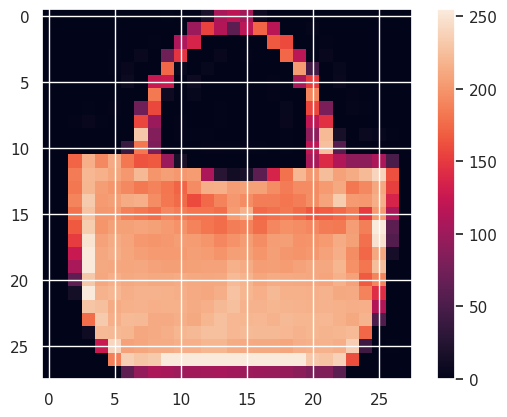

In [ ]:
plt.figure()
plt.imshow(train_data[100])

plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_labels_real = [class_names[x] for x in train_labels]

In [ ]:
train_data = train_data/255
test_data = test_data/255

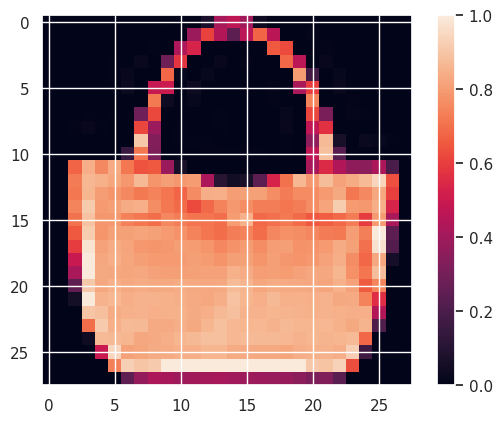

In [ ]:
plt.figure()
plt.imshow(train_data[100])

plt.colorbar()
plt.grid(True)
plt.show()

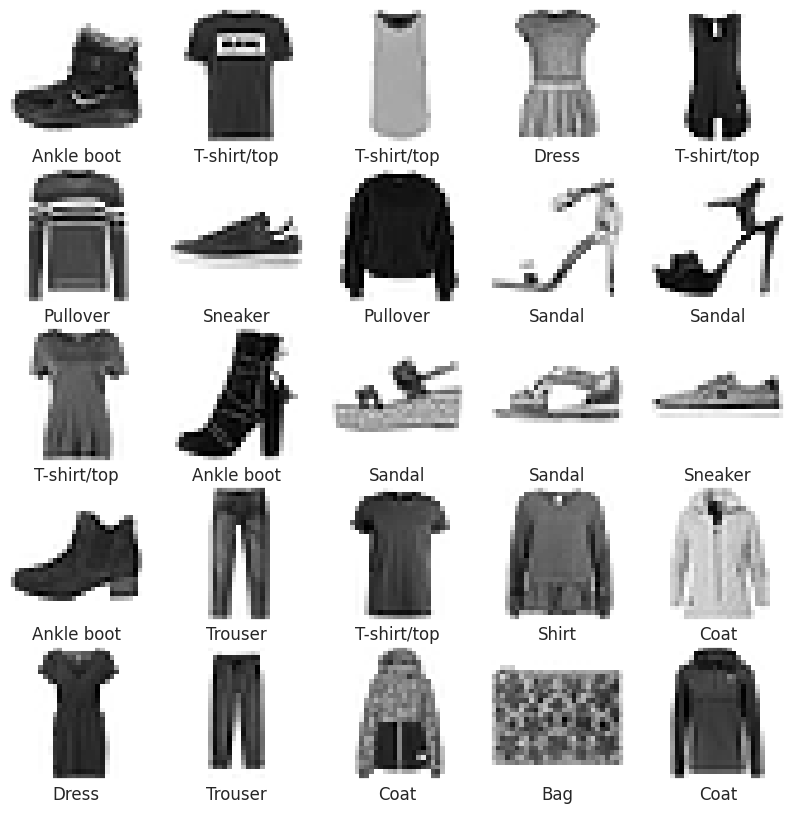

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels_real[i])
plt.show()

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
              ,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
callback = EarlyStopping(monitor = "val_loss",
                         min_delta = 0.1,
                         patience = 30, verbose = 1,
                         mode = "auto",
                         baseline = None,
                         restore_best_weights = True,
                        )

In [ ]:
history = model.fit(train_data,
                    train_labels,
                    epochs=100,
                    validation_data=(test_data,test_labels),
                    batch_size=32,
                    callbacks=callback)

Epoch 1/100
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5064 - accuracy: 0.8200 - val_loss: 0.4738 - val_accuracy: 0.8296
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3783 - accuracy: 0.8618 - val_loss: 0.4085 - val_accuracy: 0.8538
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3407 - accuracy: 0.8751 - val_loss: 0.3549 - val_accuracy: 0.8751
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3142 - accuracy: 0.8849 - val_loss: 0.3651 - val_accuracy: 0.8703
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2968 - accuracy: 0.8900 - val_loss: 0.3713 - val_accuracy: 0.8655
Epoch 6/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2860 - accuracy: 0.8926 - val_loss: 0.3389 - val_accuracy: 0.8783
Epoch 7/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2700 - accuracy: 0.8991 - val_loss: 0.3328 - 

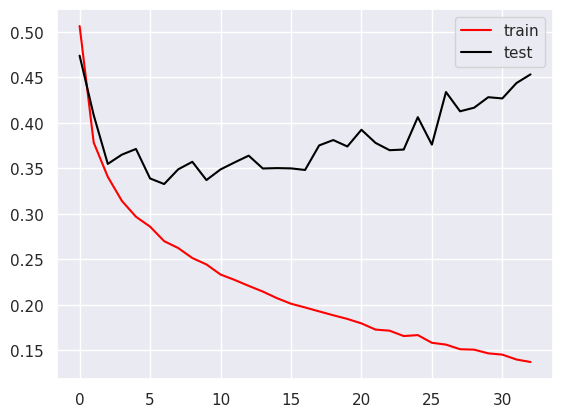

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='black', label='test')
plt.legend()
plt.show()

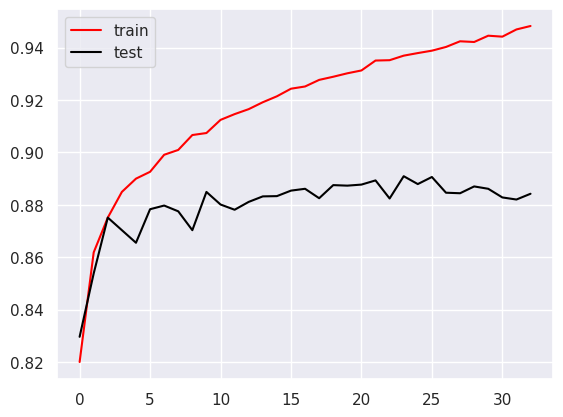

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='black', label='test')
plt.legend()
plt.show()

# MNIST DATA

In [ ]:
mnist = keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
( x_train , y_train ),( x_test , y_test)  = mnist.load_data()

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

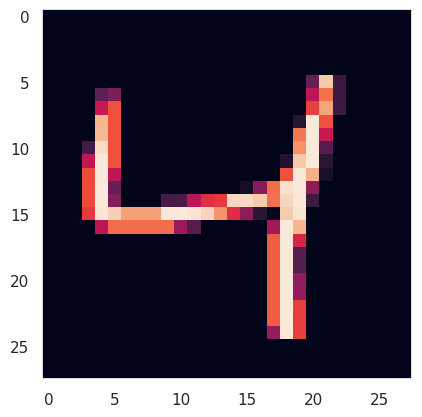

In [ ]:
plt.imshow(x_train[2])
plt.grid(False)
plt.show()

In [ ]:
x_train = x_train/255
x_test = x_test/255

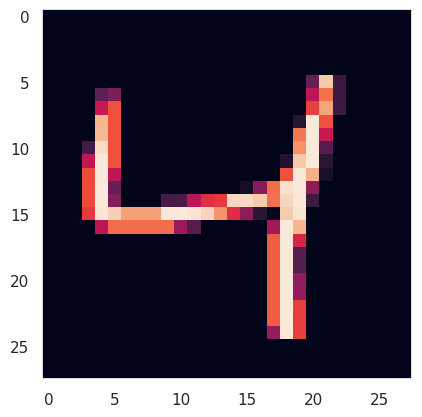

In [ ]:
plt.imshow(x_train[2])
plt.grid(False)
plt.show()

In [ ]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(32,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
Total params: 105664 (412.75 KB)
Trainable params: 105664 (412.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train ,
                    y_train ,
                    batch_size = 64 ,
                    epochs = 100 ,
                    validation_data=(x_test,y_test),
                    callbacks = callback)

Epoch 1/100
938/938 [==============================] - 9s 7ms/step - loss: 0.3490 - accuracy: 0.9043 - val_loss: 0.1638 - val_accuracy: 0.9508
Epoch 2/100
938/938 [==============================] - 7s 7ms/step - loss: 0.1375 - accuracy: 0.9600 - val_loss: 0.1178 - val_accuracy: 0.9639
Epoch 3/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0957 - accuracy: 0.9710 - val_loss: 0.1000 - val_accuracy: 0.9695
Epoch 4/100
938/938 [==============================] - 6s 7ms/step - loss: 0.0721 - accuracy: 0.9783 - val_loss: 0.0840 - val_accuracy: 0.9752
Epoch 5/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0776 - val_accuracy: 0.9757
Epoch 6/100
938/938 [==============================] - 5s 6ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0863 - val_accuracy: 0.9741
Epoch 7/100
938/938 [==============================] - 5s 6ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0879 - val_accuracy: 0.9749